In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama
import pandas as pd

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_memory_usage()
sc.logging.print_header()
sc.set_figure_params(dpi=100)

Memory usage: current 0.21 GB, difference +0.00 GB
scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


## P28

In [17]:
P28_gaba = sc.read_h5ad('P28gaba_raw.h5ad')

In [18]:
sc.pp.highly_variable_genes(P28_gaba, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs
sc.pp.scale(P28_gaba, max_value=10) #scale

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [19]:
P28_gaba_CBs = list(P28_gaba.obs.index)
P28_gaba_batch = []
for i in range(len(P28_gaba_CBs)):
    P28_gaba_batch.append(P28_gaba_CBs[i][19:25])
    
P28_gaba.obs['sample'] = P28_gaba.obs['batch']
P28_gaba.obs['sample'] = P28_gaba_batch

In [20]:
sc.tl.pca(P28_gaba, svd_solver='arpack') #run PCA
sc.pp.neighbors(P28_gaba, n_neighbors=25, n_pcs=40) #choose 25 standard for now
sc.tl.leiden(P28_gaba)
sc.tl.umap(P28_gaba)

computing PCA
    on highly variable genes
    with n_comps=50


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [23]:
P28_gaba.obs['cluster_name'] = pd.Series(cluster_namesP28, dtype="category").values #47 in 'remove'

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'sample' as categorical


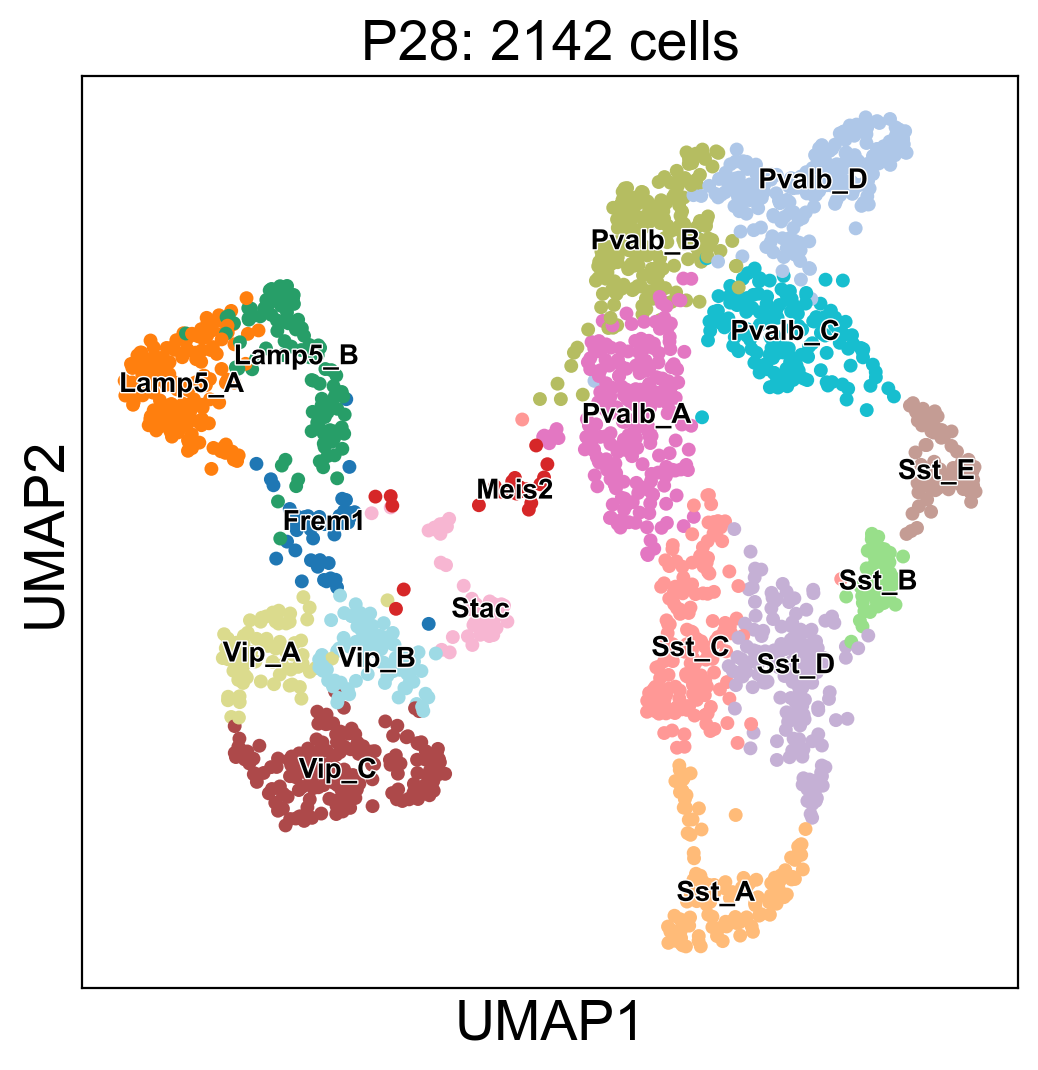

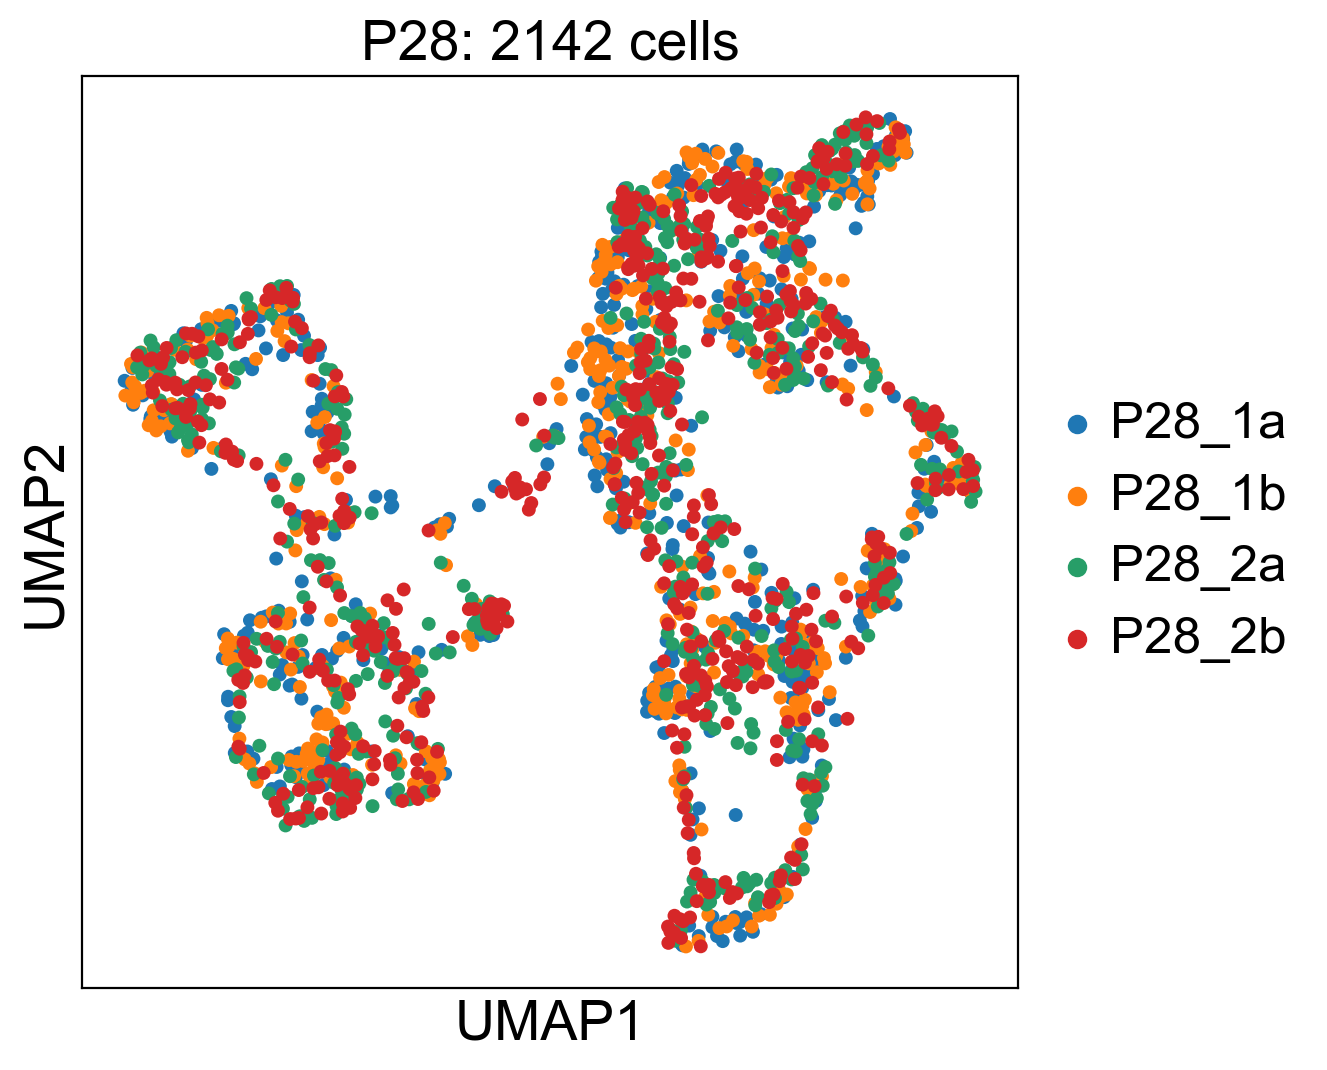

In [24]:
umap_colors = ['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5',
 '#ad494a']
sc.set_figure_params(dpi=100, figsize=(6,6), dpi_save=2000, fontsize=20)
sc.pl.umap(P28_gaba, color='cluster_name', 
           title = 'P28: ' + str(P28_gaba.shape[0]) + ' cells', frameon=True, legend_loc='on data', legend_fontoutline=1,size=100, legend_fontsize='10', palette=umap_colors)
sc.pl.umap(P28_gaba, color='sample', title = 'P28: ' + str(P28_gaba.shape[0]) + ' cells', frameon=True, size = 100)


bias_markers = ['Snap25', 'Slc17a7', 'Gad1', 'Gad2', 'Pvalb', 'Lamp5', 'Vip', 'Sst', 'Meis2', 'Igsf9b',
                'Pax6', 'Serpinf1', 'Sncg']

bias_pos = [(0,8), (9,17)]
bias_labels = ['Neuronal', 'Non-Neuronal']
#sc.pl.dotplot(P28_gaba, bias_markers, groupby='leiden', dendrogram=True)

In [8]:
P28_gaba[P28_gaba.obs.cluster_name=='Frem1',:]

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 94 × 30869
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Doublet', 'Doublet Score', 'cluster', 'Class_broad', 'cluster_name', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'cluster_name_colors', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

cluster_dict = {0:'Pvalb_1', 1:'Lamp5_1', 2:'Pvalb_3', 3:'Pvalb_2', 4:'Vip_2', 5:'Sst_2', 6:'Sst_3', 7:'Pvalb_4', 
                8:'Sst_4', 9:'Ambig_1', 10:'Vip_3', 11:'Vip_1', 12:'Sst_5', 13:'Ambig_2', 14:'Sst_1', 15:'Ambig_3'}

cluster = []
for i in cluster_dict: cluster.append((cluster_dict[i]))

P28_gaba.obs['cluster'] = P28_gaba.obs['leiden']
P28_gaba.rename_categories(key='cluster', categories=cluster)

### Finalize type names P28

In [ ]:
P28_gaba.obs['cluster_name'] = P28_gaba.obs['cluster']
P28_gaba.obs['cluster_name'] = pd.Series(cluster_namesP28, dtype="category").values #47 in 'remove'

In [ ]:
P28_gaba = P28_gaba[P28_gaba.obs['cluster_name']!='remove',:]

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


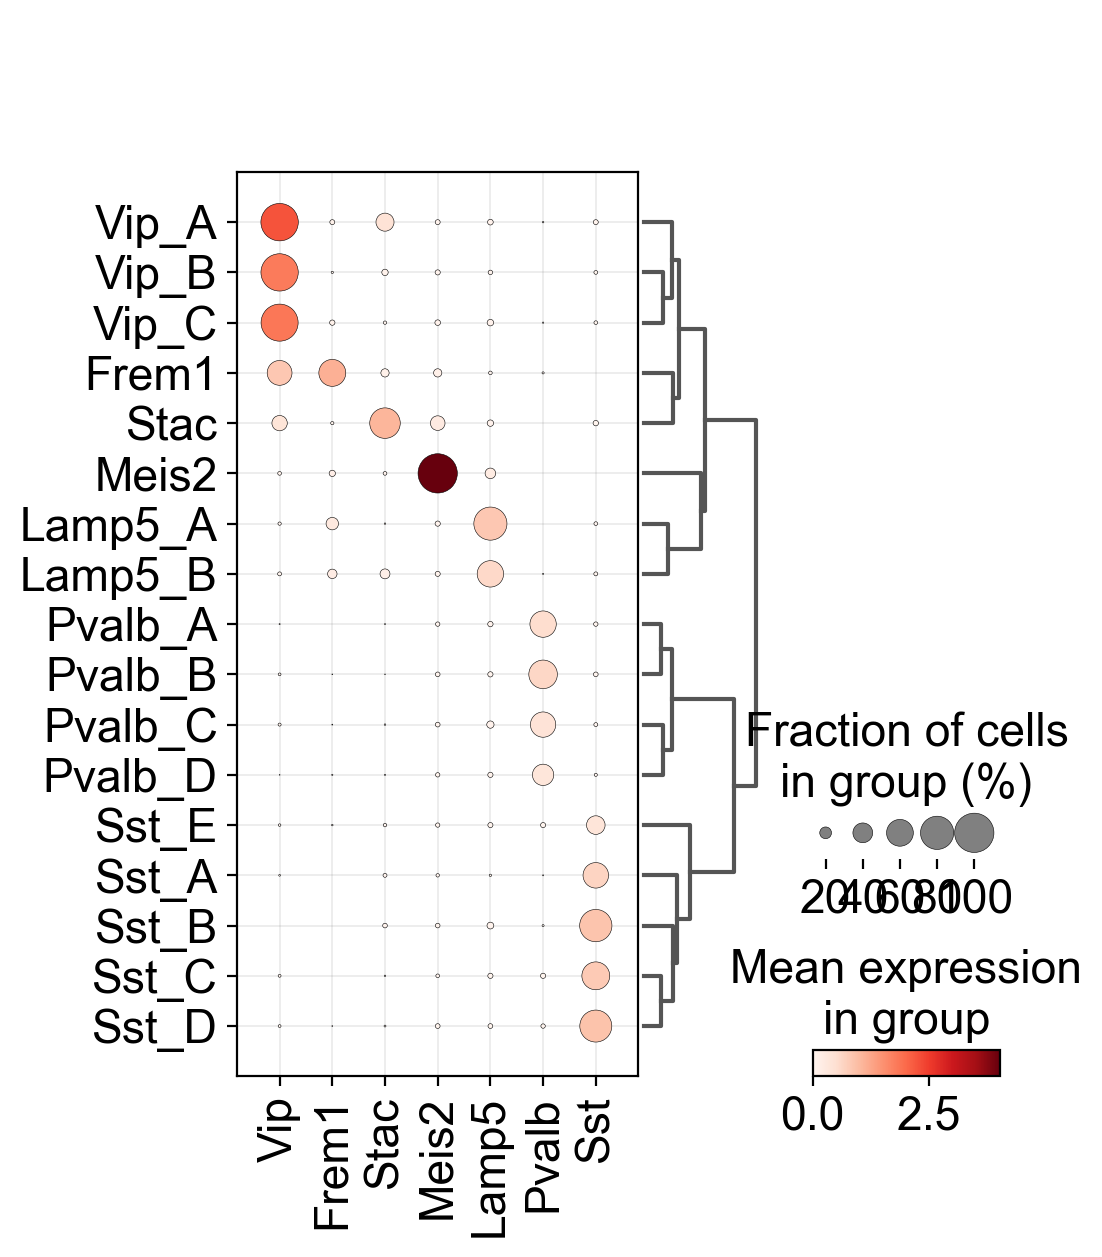

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


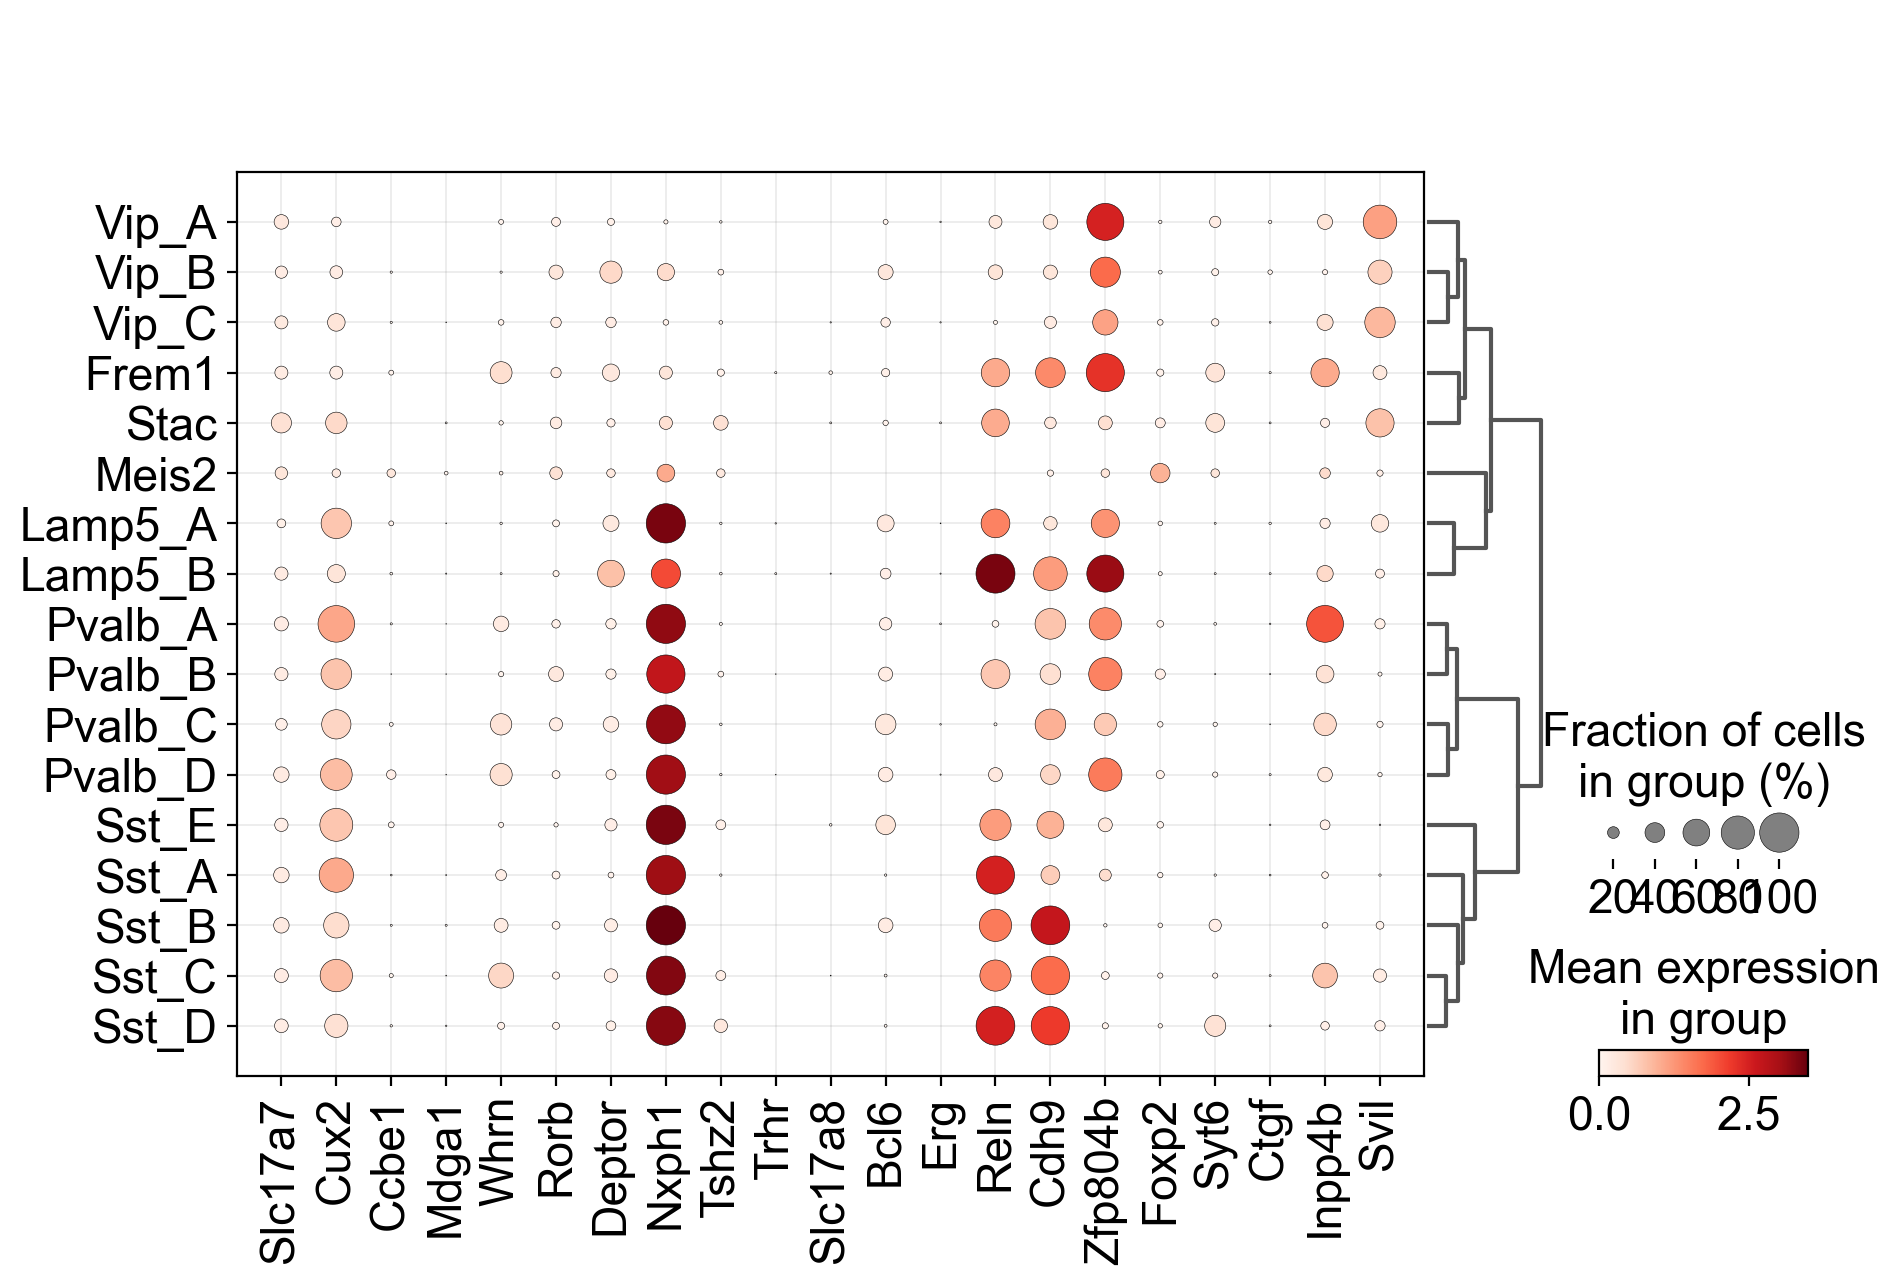

In [26]:
bias_markers = ['Vip', 'Frem1', 'Stac', 'Meis2', 'Lamp5', 'Pvalb', 'Sst']
layer_markers = ['Slc17a7',
    'Cux2', 'Ccbe1', 'Mdga1', 
              'Whrn', 'Rorb',
              'Deptor', 
              'Nxph1', 'Tshz2', 'Trhr', 'Slc17a8', 
              'Bcl6', 'Erg', 'Reln', 
              'Cdh9', 'Zfp804b',
              'Foxp2', 'Syt6',
              'Ctgf', 'Inpp4b', 'Svil']
bias_pos = [(0,8), (9,17)]
bias_labels = ['Neuronal', 'Non-Neuronal']
sc.pl.dotplot(P28_gaba, bias_markers, groupby='cluster_name', dendrogram=True, return_fig=True).style(cmap='Reds', grid=True).show()
sc.pl.dotplot(P28_gaba, layer_markers, groupby='cluster_name', dendrogram=True, return_fig=True).style(cmap='Reds', grid=True).show()

# Save

In [27]:
P28_gaba.write_h5ad('P28_gaba0828.h5ad')

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
